Initialize

In [2]:
import os
import pandas as pd
import numpy as np
# import scipy
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
# import scanpy as sc
# import anndata as ad


In [4]:
path_proj_root = '/Users/curtismcginity/stanford/research/proj/MoTrPAC/dev/'
path_data = os.path.join(path_proj_root, 'data')
path_data_r6m = os.path.join(path_data, 'rat-6m')
path_contrast_time_txt = os.path.join(path_data_r6m, 'rat-acute-06_t68-liver_epigen-atac-seq_da_timewise-deseq2-phase-frip-t2f_v2.0.txt')
path_indv_tsv = p=os.path.join(path_data_r6m, 'motrpac_pass1ac-06_epigen-atac-seq_t68-liver_stanford_limma_norm.tsv')

In [7]:
# conver contrast time txt to polars
dftxt = pl.read_csv(path_contrast_time_txt, separator="\t")
# inspect header to ensure accuracy
print(dftxt.head(3))

shape: (3, 10)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬──────────┬───────────┐
│ assay      ┆ feature_I ┆ tissue    ┆ contrast  ┆ … ┆ logFC     ┆ lfcSE    ┆ p_value  ┆ adj_p_val │
│ ---        ┆ D         ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---      ┆ ---      ┆ ue        │
│ str        ┆ ---       ┆ str       ┆ str       ┆   ┆ f64       ┆ f64      ┆ f64      ┆ ---       │
│            ┆ str       ┆           ┆           ┆   ┆           ┆          ┆          ┆ str       │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪══════════╪═══════════╡
│ epigen-ata ┆ chr1:1000 ┆ t68-liver ┆ acute_00. ┆ … ┆ 0.636047  ┆ 0.568352 ┆ 0.263094 ┆ NA        │
│ c-seq      ┆ 04215-100 ┆           ┆ 0h_IPE-co ┆   ┆           ┆          ┆          ┆           │
│            ┆ 004509    ┆           ┆ ntrol_00. ┆   ┆           ┆          ┆          ┆           │
│            ┆           ┆           ┆ 0h_IP…    ┆   ┆           ┆          

In [8]:
# convert indv tsv to polars
dfindv = pl.read_csv(path_indv_tsv, separator="\t")
# inspect header to ensure accuracy
print(dfindv.head(3))


shape: (3, 119)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Chr_Locat ┆ 900010168 ┆ 900050168 ┆ 900070168 ┆ … ┆ 908030168 ┆ 908070168 ┆ 908090168 ┆ 90810016 │
│ ion       ┆ 04        ┆ 04        ┆ 04        ┆   ┆ 04        ┆ 04        ┆ 04        ┆ 804      │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ chr1:1000 ┆ 5.072018  ┆ 6.326373  ┆ 0.0       ┆ … ┆ 6.08771   ┆ 5.307832  ┆ 5.728953  ┆ 1.532331 │
│ 04215-100 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 004509    ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ chr1:1000 ┆ 5.072018  ┆ 1.807535  ┆ 9.399792  ┆ … ┆ 3.043855  ┆ 2.123133 

In [10]:
# export dfs to parquet with original names
ptxt = os.path.join(path_data_r6m, 'rat-acute-06_t68-liver_epigen-atac-seq_da_timewise-deseq2-phase-frip-t2f_v2.0.parquet')
pindv = os.path.join(path_data_r6m, 'motrpac_pass1ac-06_epigen-atac-seq_t68-liver_stanford_limma_norm.parquet')
dftxt.write_parquet(ptxt)
dfindv.write_parquet(pindv)


In [11]:
# clear memory
del dftxt, dfindv

In [16]:
# read in parquet files, filter for sex=male, then pass to pandas
dfplmale = pl.read_parquet(ptxt).filter(pl.col("sex") == "male")
dfmale = dfplmale.to_pandas()


# clear polars df from memory
del dfplmale

In [18]:
dfmale.head(7)

,assay,feature_ID,tissue,contrast,timepoint,sex,logFC,lfcSE,p_value,adj_p_value
0,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.0h_IPE-control_00.0h_IPE,00.0h_IPE,male,0.636047,0.568352,0.263094,NA
1,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.5h-control_00.5h,00.5h,male,-0.037552,0.548057,0.945373,NA
2,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_01.0h-control_04.0h,01.0h,male,1.073052,0.626793,0.086902,NA
3,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_04.0h-control_04.0h,04.0h,male,1.438703,0.667616,0.031163,NA
4,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_07.0h-control_07.0h,07.0h,male,-0.544378,0.545802,0.318574,0.99999807787503
5,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_24.0h-control_00.0h,24.0h,male,0.151615,0.525375,0.772900,NA
6,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_48.0h-control_00.0h,48.0h,male,0.946096,0.459115,0.039332,NA


In [15]:
dfmale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8209208 entries, 0 to 8209207
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   assay        object 
 1   feature_ID   object 
 2   tissue       object 
 3   contrast     object 
 4   timepoint    object 
 5   sex          object 
 6   logFC        float64
 7   lfcSE        float64
 8   p_value      float64
 9   adj_p_value  object 
dtypes: float64(3), object(7)
memory usage: 626.3+ MB


In [23]:
def standardize_data_types(df):
    """
    Standardize data types of the dataframe according to specified requirements.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to standardize
        
    Returns:
    --------
    pandas.DataFrame
        The dataframe with standardized data types
    """
    # Convert text columns to string type
    text_columns = ['assay', 'feature_ID', 'tissue', 'contrast', 'timepoint', 'sex']
    for col in text_columns:
        if col in df.columns:
            df[col] = df[col].astype(str)
    
    # Convert float columns
    float_columns = ['logFC', 'lfcSE', 'p_value']
    for col in float_columns:
        if col in df.columns:
            df[col] = df[col].astype(float)
    
    # Handle adj_p_value column - convert 'NA' to 1.0
    if 'adj_p_value' in df.columns:
        # Replace 'NA' with 1.0
        df['adj_p_value'] = df['adj_p_value'].replace('NA', 1.0)
        # Convert to float
        df['adj_p_value'] = df['adj_p_value'].astype(float)
    
    return df

dfmale = standardize_data_types(dfmale)
dfmale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8209208 entries, 0 to 8209207
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   assay        object 
 1   feature_ID   object 
 2   tissue       object 
 3   contrast     object 
 4   timepoint    object 
 5   sex          object 
 6   logFC        float64
 7   lfcSE        float64
 8   p_value      float64
 9   adj_p_value  float64
dtypes: float64(4), object(6)
memory usage: 626.3+ MB


In [25]:
dfmale.head(9)

,assay,feature_ID,tissue,contrast,timepoint,sex,logFC,lfcSE,p_value,adj_p_value
0,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.0h_IPE-control_00.0h_IPE,00.0h_IPE,male,0.636047,0.568352,0.263094,1.000000
1,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.5h-control_00.5h,00.5h,male,-0.037552,0.548057,0.945373,1.000000
2,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_01.0h-control_04.0h,01.0h,male,1.073052,0.626793,0.086902,1.000000
3,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_04.0h-control_04.0h,04.0h,male,1.438703,0.667616,0.031163,1.000000
4,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_07.0h-control_07.0h,07.0h,male,-0.544378,0.545802,0.318574,0.999998
5,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_24.0h-control_00.0h,24.0h,male,0.151615,0.525375,0.772900,1.000000
6,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_48.0h-control_00.0h,48.0h,male,0.946096,0.459115,0.039332,1.000000
7,epigen-atac-seq,chr1:100005933-100006133,t68-liver,acute_00.0h_IPE-control_00.0h_IPE,00.0h_IPE,male,0.554128,0.842281,0.510609,1.000000
8,epigen-atac-seq,chr1:100005933-100006133,t68-liver,acute_00.5h-control_00.5h,00.5h,male,-0.202798,0.718402,0.777721,1.000000


Total number of feature_ID groups: 1172744
Number of significant feature_ID groups: 15721
Percentage of significant groups: 1.34%

Distribution of significant adj_p_values:


count    1.788600e+04
mean     4.816715e-02
std      3.076742e-02
min      4.402026e-19
25%      2.045145e-02
50%      4.864748e-02
75%      7.563763e-02
max      9.999806e-02
Name: adj_p_value, dtype: float64

/Users/curtismcginity/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


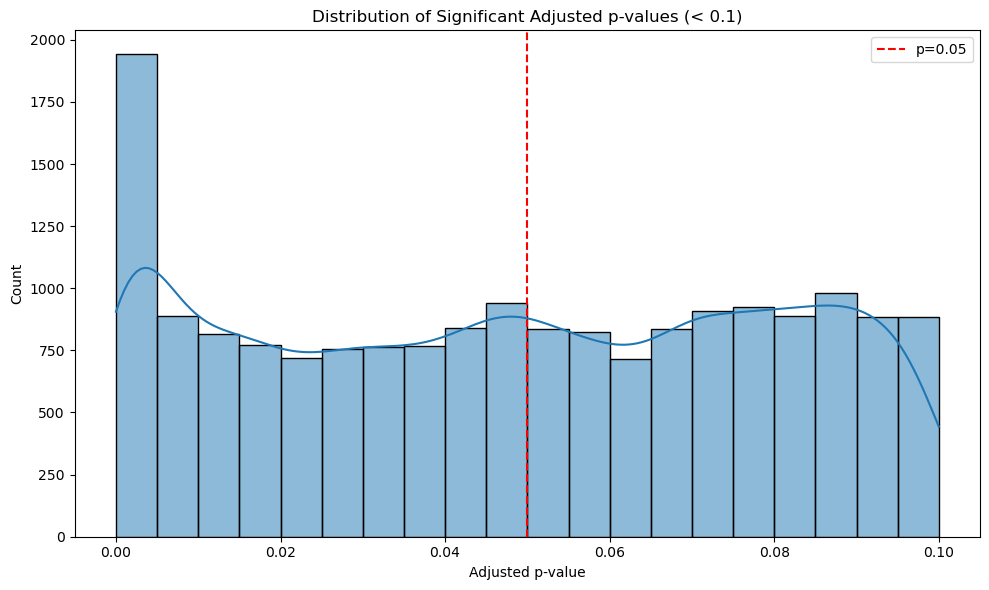

In [26]:
# Count total number of feature_ID groups
total_groups = dfmale['feature_ID'].nunique()
print(f"Total number of feature_ID groups: {total_groups}")

# Add significance indicator to each row
dfmale['is_significant'] = (dfmale
    .groupby('feature_ID')['adj_p_value']
    .transform(lambda x: np.min(x) < 0.1)
    .astype(int)
)

# Filter to keep only significant groups
dfmale_sig = dfmale[dfmale['is_significant'] == 1]

# Count significant groups and calculate percentage
sig_groups = dfmale_sig['feature_ID'].nunique()
sig_percentage = (sig_groups / total_groups) * 100

print(f"Number of significant feature_ID groups: {sig_groups}")
print(f"Percentage of significant groups: {sig_percentage:.2f}%")

# Analyze distribution of significant adj_p_values
print("\nDistribution of significant adj_p_values:")
sig_pvals = (dfmale_sig
    .loc[dfmale_sig['adj_p_value'] < 0.1, 'adj_p_value']
)
display(sig_pvals.describe())

# Plot histogram of significant adj_p_values
plt.figure(figsize=(10, 6))
sns.histplot(sig_pvals, bins=20, kde=True)
plt.title('Distribution of Significant Adjusted p-values (< 0.1)')
plt.xlabel('Adjusted p-value')
plt.ylabel('Count')
plt.axvline(x=0.05, color='red', linestyle='--', label='p=0.05')
plt.legend()
plt.tight_layout()
plt.show()



Total number of feature_ID groups: 1172744
Number of significant feature_ID groups: 1851
Percentage of significant groups: 0.16%

Distribution of significant adj_p_values:


count    1.941000e+03
mean     1.572936e-03
std      1.558939e-03
min      4.402026e-19
25%      1.090359e-04
50%      1.057553e-03
75%      2.863699e-03
max      4.988240e-03
Name: adj_p_value, dtype: float64

/Users/curtismcginity/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


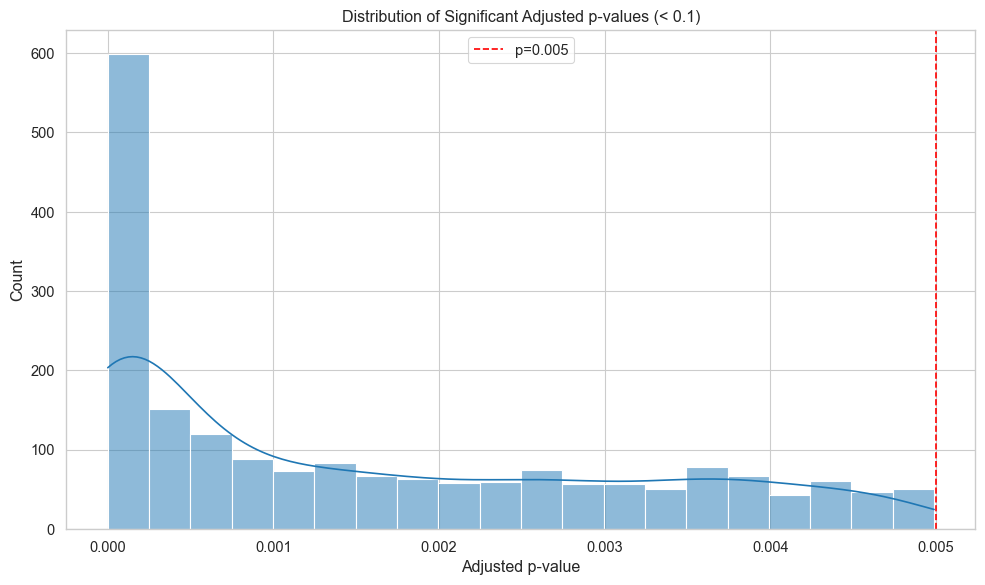

In [53]:
# Count total number of feature_ID groups
total_groups = dfmale['feature_ID'].nunique()
print(f"Total number of feature_ID groups: {total_groups}")

thresh = 0.005

# Add significance indicator to each row
dfmale['is_significant'] = (dfmale
    .groupby('feature_ID')['adj_p_value']
    .transform(lambda x: np.min(x) < thresh)
    .astype(int)
)

# Filter to keep only significant groups
dfmale_sig = dfmale[dfmale['is_significant'] == 1]

# Count significant groups and calculate percentage
sig_groups = dfmale_sig['feature_ID'].nunique()
sig_percentage = (sig_groups / total_groups) * 100

print(f"Number of significant feature_ID groups: {sig_groups}")
print(f"Percentage of significant groups: {sig_percentage:.2f}%")

# Analyze distribution of significant adj_p_values
print("\nDistribution of significant adj_p_values:")
sig_pvals = (dfmale_sig
    .loc[dfmale_sig['adj_p_value'] < thresh, 'adj_p_value']
)
display(sig_pvals.describe())

# Plot histogram of significant adj_p_values
plt.figure(figsize=(10, 6))
sns.histplot(sig_pvals, bins=20, kde=True)
plt.title('Distribution of Significant Adjusted p-values (< 0.1)')
plt.xlabel('Adjusted p-value')
plt.ylabel('Count')
plt.axvline(x=thresh, color='red', linestyle='--', label=f'p={thresh:.3f}')
plt.legend()
plt.tight_layout()
plt.show()

Analyze

In [34]:
dfmale.head(2)

,assay,feature_ID,tissue,contrast,timepoint,sex,logFC,lfcSE,p_value,adj_p_value,is_significant
0,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.0h_IPE-control_00.0h_IPE,00.0h_IPE,male,0.636047,0.568352,0.263094,1.0,0
1,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.5h-control_00.5h,00.5h,male,-0.037552,0.548057,0.945373,1.0,0


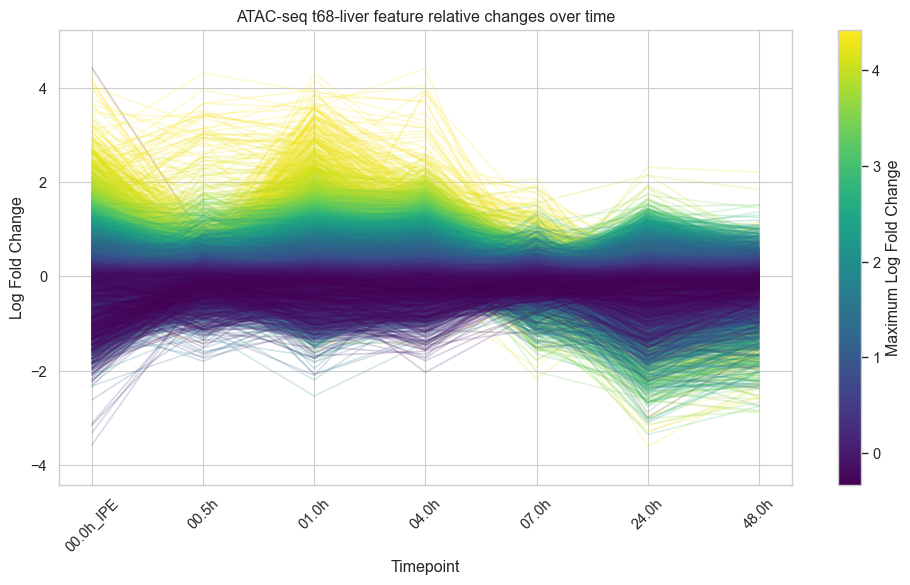

In [52]:
# Add a color bar legend
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colorbar as cbar

# Set seaborn style for professional scientific plots
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Assuming dfmale_sig is already filtered to significant groups
# Get the assay and tissue values (assuming they're consistent in the dataset)
assay_name = dfmale_sig['assay'].iloc[0]
tissue_name = dfmale_sig['tissue'].iloc[0]

# Get unique timepoints and sort them (these will be our x-axis)
timepoints = sorted(dfmale_sig['timepoint'].unique())

# Create a figure with appropriate size
plt.figure(figsize=(10, 6))

# Calculate maximum logFC for each feature_ID
max_logfc_by_feature = (dfmale_sig
    .groupby('feature_ID')['logFC']
    .max()
    .sort_values(ascending=False)
)

# Create a color palette based on the sorted maximum logFC values
# Using a sequential colormap from seaborn (can be changed to preference)
palette = sns.color_palette("viridis", n_colors=len(max_logfc_by_feature))

# Plot each feature_ID as a separate line with color based on max logFC
for i, (feature_id, max_val) in enumerate(max_logfc_by_feature.items()):
    # Get data for this feature
    group = (dfmale_sig
        .loc[dfmale_sig['feature_ID'] == feature_id]
        .sort_values('timepoint')
    )
    
    # Plot the line with transparency and color from palette
    plt.plot(group['timepoint'], group['logFC'], alpha=0.2, color=palette[-i])

# Set the x-axis labels to be the timepoints
plt.xticks(range(len(timepoints)), timepoints, rotation=45)

# Calculate y-axis range with 10% padding
y_min = dfmale_sig['logFC'].min()
y_max = dfmale_sig['logFC'].max()
y_range = y_max - y_min
y_padding = 0.1 * y_range
plt.ylim(y_min - y_padding, y_max + y_padding)

# Set labels and title
plt.xlabel('Timepoint')
plt.ylabel('Log Fold Change')
plt.title(f"ATAC-seq {tissue_name} feature relative changes over time")

# Create a ScalarMappable for the colorbar
norm = Normalize(vmin=max_logfc_by_feature.min(), vmax=max_logfc_by_feature.max())
sm = ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Add colorbar
cax = plt.colorbar(sm, ax=plt.gca())
cax.set_label('Maximum Log Fold Change')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
import skfuzzy as fuzz

Visualize

Scratch